<a href="https://colab.research.google.com/github/srinijalanda93/Predictive_Analystics/blob/main/2448526_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
higher_education_students_performance_evaluation = fetch_ucirepo(id=856)

# data (as pandas dataframes)
X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets

# metadata
print(higher_education_students_performance_evaluation.metadata)

# variable information
print(higher_education_students_performance_evaluation.variables)


{'uci_id': 856, 'name': 'Higher Education Students Performance Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/856/data.csv', 'abstract': "The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.", 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 145, 'num_features': 31, 'feature_types': ['Integer'], 'demographics': ['Age', 'Sex', 'Education Level', 'Marital Status', 'Income', 'Occupation'], 'target_col': ['OUTPUT Grade'], 'index_col': ['Student ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51G82', 'creators': ['Nevriye Yilmaz', 'Boran Şekeroğlu'], 'intro_

In [3]:
X.cloumns

AttributeError: 'DataFrame' object has no attribute 'cloumns'

In [5]:
X.columns

Index(['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity',
       'Do you have a partner', 'Total salary if available',
       'Transportation to the university', 'Accomodation type in Cyprus',
       'Mother's education', 'Father's education',
       'Number of sisters/brothers (if available)', 'Parental status',
       'Mother's occupation', 'Father's occupation', 'Weekly study hours',
       'Reading frequency (non-scientific books/journals)',
       'Reading frequency (scientific books/journals)',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom',
       'Cumula

In [6]:
y.columns

Index(['OUTPUT Grade'], dtype='object')

In [7]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# --- Load Dataset from UCI Repository ---
data = fetch_ucirepo(id=856)
X = data.data.features
y = data.data.targets

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nColumns in X:\n", X.columns)
print("\nTarget:\n", y.columns)

# --- Combine X and y for reference (optional) ---
df = pd.concat([X, y], axis=1)
df.head()

Shape of X: (145, 31)
Shape of y: (145, 1)

Columns in X:
 Index(['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity',
       'Do you have a partner', 'Total salary if available',
       'Transportation to the university', 'Accomodation type in Cyprus',
       'Mother's education', 'Father's education',
       'Number of sisters/brothers (if available)', 'Parental status',
       'Mother's occupation', 'Father's occupation', 'Weekly study hours',
       'Reading frequency (non-scientific books/journals)',
       'Reading frequency (scientific books/journals)',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and succ

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accomodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,OUTPUT Grade
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [8]:
df.sample(5)

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accomodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,OUTPUT Grade
127,1,1,2,4,2,2,2,1,4,3,...,1,1,3,2,2,1,2,2,9,1
25,2,2,2,3,2,2,1,1,1,2,...,1,1,2,1,3,2,1,2,1,3
125,1,1,2,5,1,1,2,1,1,3,...,1,2,3,2,3,1,1,3,9,2
132,1,1,1,5,2,1,2,1,1,2,...,2,1,3,2,3,1,5,4,9,3
96,1,2,2,4,2,1,1,1,2,3,...,1,1,3,2,3,2,2,3,7,7


In [9]:
# --- Check for missing values ---
print("\nMissing Values:\n", df.isnull().sum().sum())


Missing Values:
 0


In [10]:
# --- Drop non-informative column (Course ID) ---
df = df.drop(columns=['Course ID'])

# --- Drop the target column for unsupervised clustering ---
X = df.drop(columns=['OUTPUT Grade'])

In [11]:
# --- Data Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Dimensionality Reduction (for visualization only) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [12]:

# HYPERPARAMETER TUNING — Choose optimal K using metrics

silhouette_scores = []
ch_scores = []
db_scores = []
K_range = range(2, 11)

In [13]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)

    silhouette_scores.append(sil)
    ch_scores.append(ch)
    db_scores.append(db)

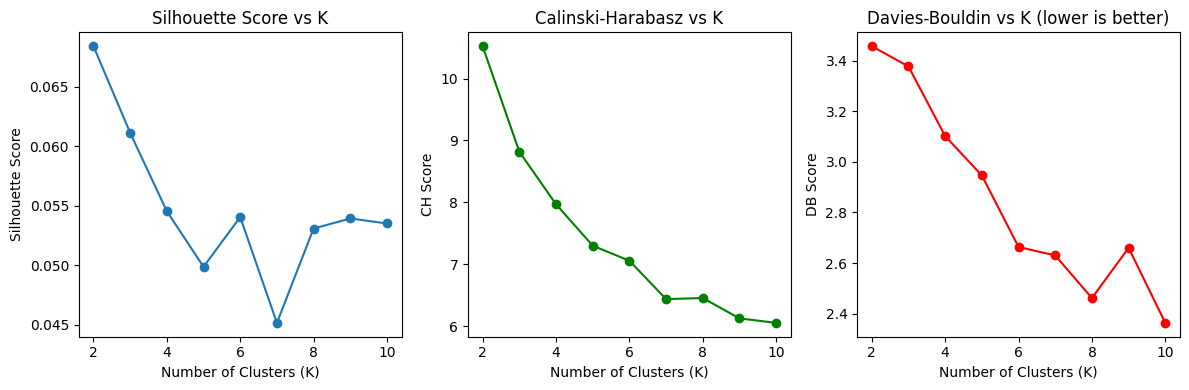

In [14]:
# --- Plot the tuning metrics ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1,3,2)
plt.plot(K_range, ch_scores, marker='o', color='green')
plt.title('Calinski-Harabasz vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('CH Score')

plt.subplot(1,3,3)
plt.plot(K_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin vs K (lower is better)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('DB Score')
plt.tight_layout()
plt.show()


Final Clustering Evaluation:
Silhouette Score: 0.061
Calinski-Harabasz Score: 8.818
Davies-Bouldin Score: 3.377


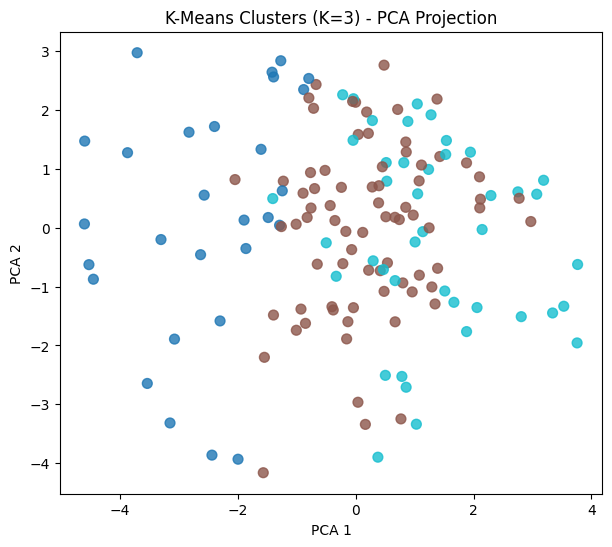

In [15]:
# ================================================================
# Final Model — Choose best K (based on silhouette or elbow)
# ================================================================
best_k = 3  # Example: Choose K=3 after observing the plots
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# --- Add cluster labels to DataFrame ---
df['Cluster'] = clusters

# --- Evaluate clustering ---
sil_final = silhouette_score(X_scaled, clusters)
ch_final = calinski_harabasz_score(X_scaled, clusters)
db_final = davies_bouldin_score(X_scaled, clusters)

print("\nFinal Clustering Evaluation:")
print(f"Silhouette Score: {sil_final:.3f}")
print(f"Calinski-Harabasz Score: {ch_final:.3f}")
print(f"Davies-Bouldin Score: {db_final:.3f}")

# --- PCA Visualization of Clusters ---
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', s=50, alpha=0.8)
plt.title(f'K-Means Clusters (K={best_k}) - PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



Cluster Profile (Mean of Features):

         Student Age       Sex  Graduated high-school type  Scholarship type  \
Cluster                                                                        
0           1.535714  1.214286                    1.785714          3.250000   
1           1.453333  1.813333                    1.920000          3.746667   
2           1.976190  1.476190                    2.095238          3.476190   

         Additional work  Regular artistic or sports activity  \
Cluster                                                         
0               1.607143                             1.500000   
1               1.933333                             1.666667   
2               1.214286                             1.547619   

         Do you have a partner  Total salary if available  \
Cluster                                                     
0                     1.464286                   2.107143   
1                     1.573333                   1.3

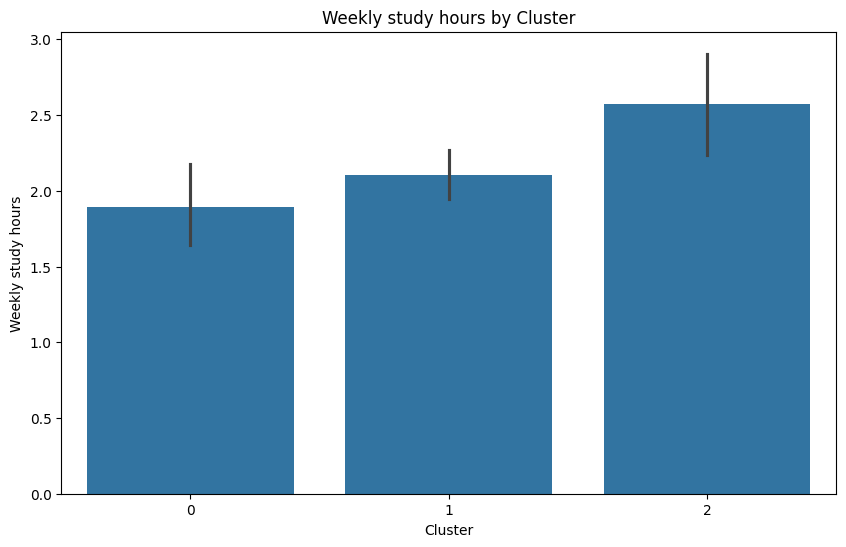

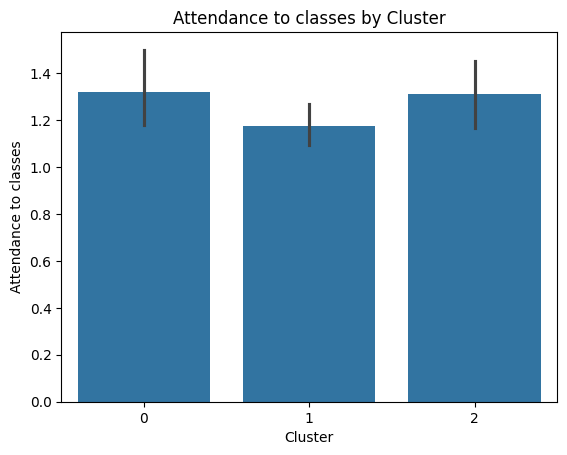

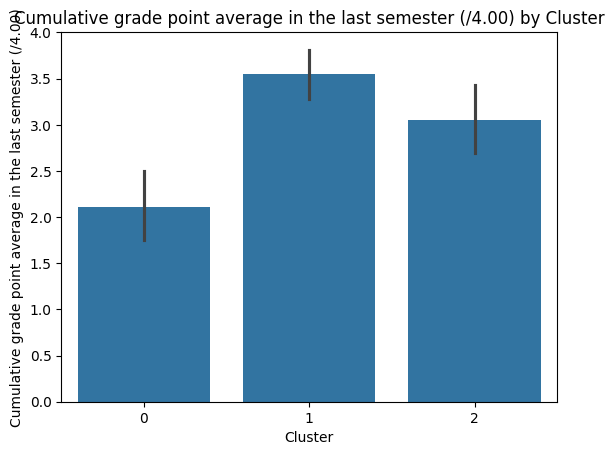

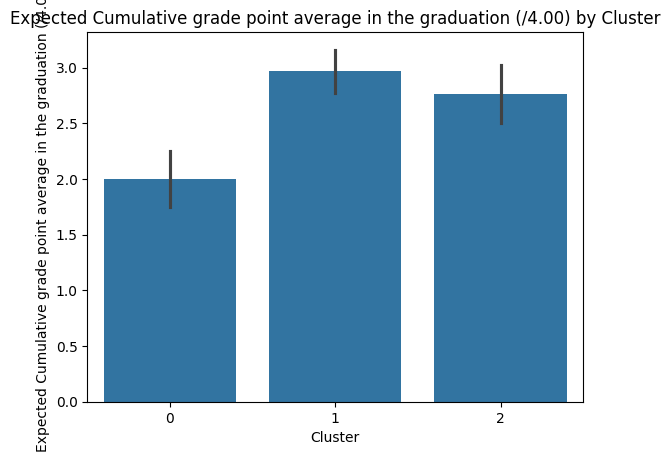

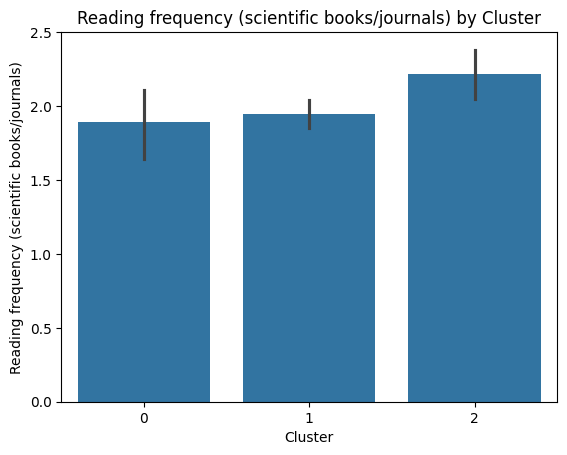

In [16]:
# CLUSTER PROFILING / INTERPRETATION
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Profile (Mean of Features):\n")
print(cluster_profile)

# --- Visualize profiles for selected features ---
selected_features = [
    'Weekly study hours',
    'Attendance to classes',
    'Cumulative grade point average in the last semester (/4.00)',
    'Expected Cumulative grade point average in the graduation (/4.00)',
    'Reading frequency (scientific books/journals)'
]

plt.figure(figsize=(10,6))
for feature in selected_features:
    sns.barplot(data=df, x='Cluster', y=feature)
    plt.title(f'{feature} by Cluster')
    plt.show()